In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

# Classification using sklearn
Scikit-learn (sklearn) is a Python library dedicated to machine learning. It contains classifier and regression algorithm objects which implement an API for training and predicting models. Additionally, it contains some methods for data manipulation and performance metric measuring of predictrive models.

### Quick example - Iris dataset

In [2]:
iris = sns.load_dataset('iris') #seaborn has some built in datasets
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

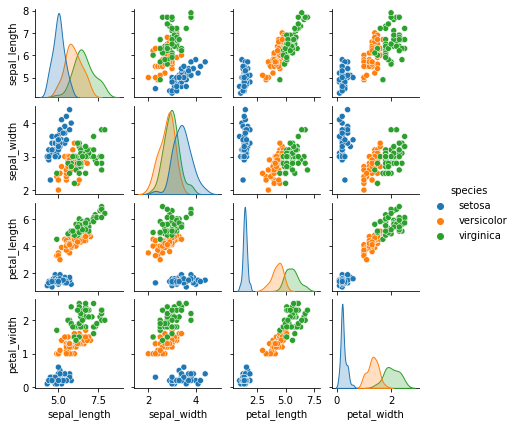

In [3]:
sns.pairplot(iris, hue='species', height=1.5);

##### Splitting the data set into feature vector X and target variable y

In [4]:
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


##### Splitting the data set into training and test sets. By default, test set size is 25% of data set.

In [5]:
#from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

##### Training and predicting using Naive Bayes classifier

In [6]:
#from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
predicted

index  sepal_length  sepal_width  petal_length  petal_width  index  \
0      14           5.8          4.0           1.2          0.2     14   
1      98           5.1          2.5           3.0          1.1     98   
2      75           6.6          3.0           4.4          1.4     75   
3      16           5.4          3.9           1.3          0.4     16   
4     131           7.9          3.8           6.4          2.0    131   
5      56           6.3          3.3           4.7          1.6     56   
6     141           6.9          3.1           5.1          2.3    141   
7      44           5.1          3.8           1.9          0.4     44   
8      29           4.7          3.2           1.6          0.2     29   
9     120           6.9          3.2           5.7          2.3    120   
10     94           5.6          2.7           4.2          1.3     94   
11      5           5.4          3.9           1.7          0.4      5   
12    102           7.1          3.0           5.9          2.1    102   
13     51           6.4          3.2           4.5          1.5     51   
14     78           6.0          2.9           4.5          1.5     78   
15     42           4.4          3.2           1.3          0.2     42   
16     92           5.8          2.6           4.0          1.2     92   
17     66           5.6          3.0           4.5          1.5     66   
18     31           5.4          3.4           1.5          0.4     31   
19     35           5.0          3.2           1.2          0.2     35   
20     90           5.5          2.6           4.4          1.2     90   
21     84           5.4          3.0           4.5          1.5     84   
22     77           6.7          3.0           5.0          1.7     77   
23     40           5.0          3.5           1.3          0.3     40   
24    125           7.2          3.2           6.0          1.8    125   
25     99           5.7          2.8           4.1          1.3     99   
26     33           5.5          4.2           1.4          0.2     33   
27     19           5.1          3.8           1.5          0.3     19   
28     73           6.1          2.8           4.7          1.2     73   
29    146           6.3          2.5           5.0          1.9    146   
30     91           6.1          3.0           4.6          1.4     91   
31    135           7.7          3.0           6.1          2.3    135   
32     69           5.6          2.5           3.9          1.1     69   
33    128           6.4          2.8           5.6          2.1    128   
34    114           5.8          2.8           5.1          2.4    114   
35     48           5.3          3.7           1.5          0.2     48   
36     53           5.5          2.3           4.0          1.3     53   
37     28           5.2          3.4           1.4          0.2     28   

       species  prediction  
0       setosa      setosa  
1   versicolor  versicolor  
2   versicolor  versicolor  
3       setosa      setosa  
4    virginica   virginica  
5   versicolor  versicolor  
6    virginica   virginica  
7       setosa      setosa  
8       setosa      setosa  
9    virginica   virginica  
10  versicolor  versicolor  
11      setosa      setosa  
12   virginica   virginica  
13  versicolor  versicolor  
14  versicolor  versicolor  
15      setosa      setosa  
16  versicolor  versicolor  
17  versicolor  versicolor  
18      setosa      setosa  
19      setosa      setosa  
20  versicolor  versicolor  
21  versicolor  versicolor  
22  versicolor   virginica  
23      setosa      setosa  
24   virginica   virginica  
25  versicolor  versicolor  
26      setosa      setosa  
27      setosa      setosa  
28  versicolor  versicolor  
29   virginica   virginica  
30  versicolor  versicolor  
31   virginica   virginica  
32  versicolor  versicolor  
33   virginica   virginica  
34   virginica   virginica  
35      setosa      setosa  
36  versicolor  versicolor  
37      setosa 

##### Calculate the accuracy as an average of accuracy per class

In [7]:
#from sklearn import metrics
metrics.accuracy_score(ytest, y_model)

0.9736842105263158

###### What happens if we select less columns?

In [8]:
X_iris = iris.drop(['species','petal_length','petal_width'], axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))

predicted

0.8157894736842105


index  sepal_length  sepal_width  index     species  prediction
0      14           5.8          4.0     14      setosa      setosa
1      98           5.1          2.5     98  versicolor  versicolor
2      75           6.6          3.0     75  versicolor   virginica
3      16           5.4          3.9     16      setosa      setosa
4     131           7.9          3.8    131   virginica   virginica
5      56           6.3          3.3     56  versicolor   virginica
6     141           6.9          3.1    141   virginica   virginica
7      44           5.1          3.8     44      setosa      setosa
8      29           4.7          3.2     29      setosa      setosa
9     120           6.9          3.2    120   virginica   virginica
10     94           5.6          2.7     94  versicolor  versicolor
11      5           5.4          3.9      5      setosa      setosa
12    102           7.1          3.0    102   virginica   virginica
13     51           6.4          3.2     51  versicolor   virginica
14     78           6.0          2.9     78  versicolor  versicolor
15     42           4.4          3.2     42      setosa      setosa
16     92           5.8          2.6     92  versicolor  versicolor
17     66           5.6          3.0     66  versicolor  versicolor
18     31           5.4          3.4     31      setosa      setosa
19     35           5.0          3.2     35      setosa      setosa
20     90           5.5          2.6     90  versicolor  versicolor
21     84           5.4          3.0     84  versicolor  versicolor
22     77           6.7          3.0     77  versicolor   virginica
23     40           5.0          3.5     40      setosa      setosa
24    125           7.2          3.2    125   virginica   virginica
25     99           5.7          2.8     99  versicolor  versicolor
26     33           5.5          4.2     33      setosa      setosa
27     19           5.1          3.8     19      setosa      setosa
28     73           6.1          2.8     73  versicolor  versicolor
29    146           6.3          2.5    146   virginica  versicolor
30     91           6.1          3.0     91  versicolor   virginica
31    135           7.7          3.0    135   virginica   virginica
32     69           5.6          2.5     69  versicolor  versicolor
33    128           6.4          2.8    128   virginica   virginica
34    114           5.8          2.8    114   virginica  versicolor
35     48           5.3          3.7     48      setosa      setosa
36     53           5.5          2.3     53  versicolor  versicolor
37     28           5.2          3.4     28      setosa      setosa

In [9]:
X_iris = iris.drop(['species','sepal_length','sepal_width'], axis=1)
y_iris = iris['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted

0.9736842105263158


index  petal_length  petal_width  index     species  prediction
0      14           1.2          0.2     14      setosa      setosa
1      98           3.0          1.1     98  versicolor  versicolor
2      75           4.4          1.4     75  versicolor  versicolor
3      16           1.3          0.4     16      setosa      setosa
4     131           6.4          2.0    131   virginica   virginica
5      56           4.7          1.6     56  versicolor  versicolor
6     141           5.1          2.3    141   virginica   virginica
7      44           1.9          0.4     44      setosa      setosa
8      29           1.6          0.2     29      setosa      setosa
9     120           5.7          2.3    120   virginica   virginica
10     94           4.2          1.3     94  versicolor  versicolor
11      5           1.7          0.4      5      setosa      setosa
12    102           5.9          2.1    102   virginica   virginica
13     51           4.5          1.5     51  versicolor  versicolor
14     78           4.5          1.5     78  versicolor  versicolor
15     42           1.3          0.2     42      setosa      setosa
16     92           4.0          1.2     92  versicolor  versicolor
17     66           4.5          1.5     66  versicolor  versicolor
18     31           1.5          0.4     31      setosa      setosa
19     35           1.2          0.2     35      setosa      setosa
20     90           4.4          1.2     90  versicolor  versicolor
21     84           4.5          1.5     84  versicolor  versicolor
22     77           5.0          1.7     77  versicolor   virginica
23     40           1.3          0.3     40      setosa      setosa
24    125           6.0          1.8    125   virginica   virginica
25     99           4.1          1.3     99  versicolor  versicolor
26     33           1.4          0.2     33      setosa      setosa
27     19           1.5          0.3     19      setosa      setosa
28     73           4.7          1.2     73  versicolor  versicolor
29    146           5.0          1.9    146   virginica   virginica
30     91           4.6          1.4     91  versicolor  versicolor
31    135           6.1          2.3    135   virginica   virginica
32     69           3.9          1.1     69  versicolor  versicolor
33    128           5.6          2.1    128   virginica   virginica
34    114           5.1          2.4    114   virginica   virginica
35     48           1.5          0.2     48      setosa      setosa
36     53           4.0          1.3     53  versicolor  versicolor
37     28           1.4          0.2     28      setosa      setosa

In [10]:
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)
    
    # Train Classifer
    

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    plt.show()

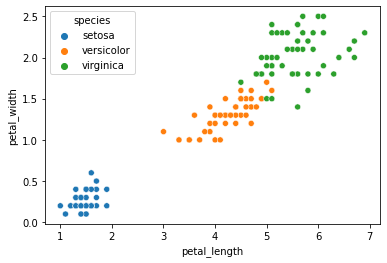

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



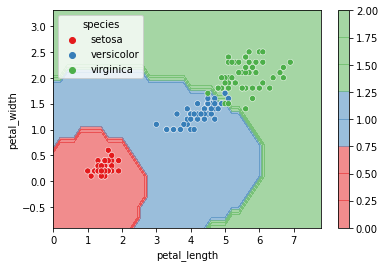

In [11]:
bayes_plot(pd.concat([X_iris,y_iris],axis=1),spread=1)

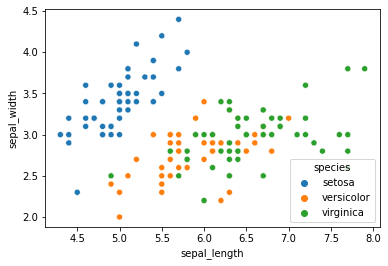

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.73      0.61      0.67        18
   virginica       0.56      0.69      0.62        13

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.77      0.76      0.76        45



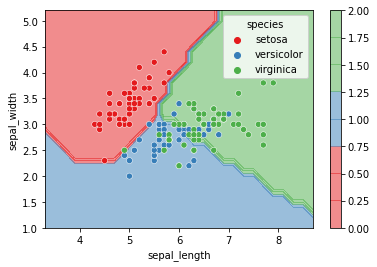

In [12]:
iris_poor = iris.drop(['petal_length','petal_width'], axis=1)
bayes_plot(iris_poor,spread=1)

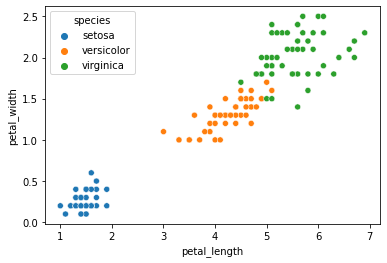

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



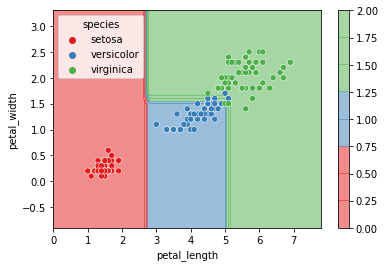

In [13]:
bayes_plot(pd.concat([X_iris,y_iris],axis=1),model=4,spread=1)

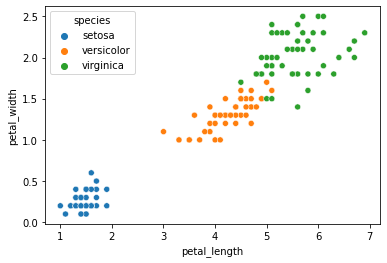

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



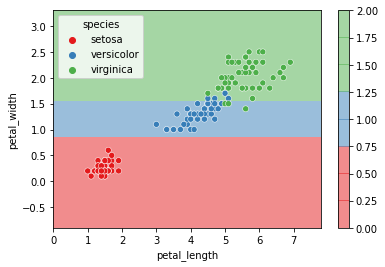

In [14]:
bayes_plot(pd.concat([X_iris,y_iris],axis=1),model=2,spread=1)

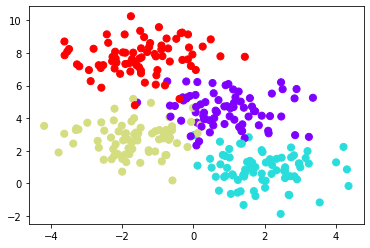

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

            X         Y  target
0    0.024583  2.962157       1
1   -1.523926  7.125732       3
2    1.274508  5.630173       0
3   -0.865523  7.801218       3
4    0.748741  2.555794       1
..        ...       ...     ...
295  1.919318  2.034555       1
296  2.827058  1.721168       1
297  0.080804  4.690690       0
298  1.447968  7.761535       3
299 -1.967827  2.637527       2

[300 rows x 3 columns]


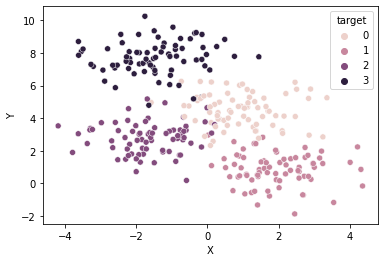

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       1.00      0.88      0.94        26
           2       0.92      0.86      0.89        14
           3       0.88      1.00      0.94        23

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90



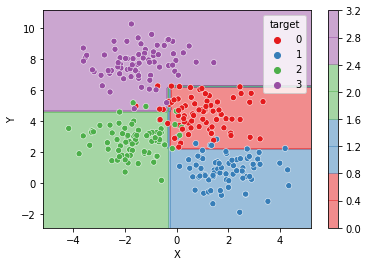

In [16]:
blob_df = pd.DataFrame(X,columns=['X','Y'])
blob_series = pd.Series(y,name="target")
print(pd.concat([blob_df,blob_series],axis=1))
bayes_plot(pd.concat([blob_df,blob_series],axis=1),model=3,spread=1)

In [17]:
from io import StringIO
#!pip install graphviz
!conda install -y python-graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

Solving environment: done

# All requested packages already installed.



                       precision    recall  f1-score   support

     advanced_backend       0.77      0.76      0.76       961
advanced_data_science       0.71      0.73      0.72       963
   advanced_front_end       0.79      0.78      0.79      1025
     beginner_backend       0.72      0.72      0.72       929
beginner_data_science       0.76      0.77      0.76       972
   beginner_front_end       0.80      0.80      0.80       949

             accuracy                           0.76      5799
            macro avg       0.76      0.76      0.76      5799
         weighted avg       0.76      0.76      0.76      5799

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.116352 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.116352 to fit



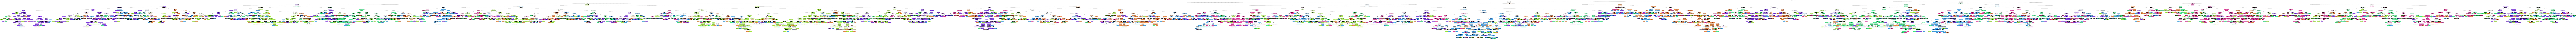

In [18]:


tech = pd.read_csv('dataset-tortuga.csv')
tech.dropna(inplace=True)
X = tech.drop(["PROFILE", "NAME","USER_ID","Unnamed: 0"],axis=1)
y = tech['PROFILE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Tech.png')
Image(graph.create_png())

                       precision    recall  f1-score   support

     advanced_backend       0.59      0.57      0.58       961
advanced_data_science       0.65      0.48      0.55       963
   advanced_front_end       0.58      0.51      0.54      1025
     beginner_backend       0.34      0.65      0.45       929
beginner_data_science       0.55      0.47      0.51       972
   beginner_front_end       0.62      0.45      0.52       949

             accuracy                           0.52      5799
            macro avg       0.56      0.52      0.53      5799
         weighted avg       0.56      0.52      0.53      5799



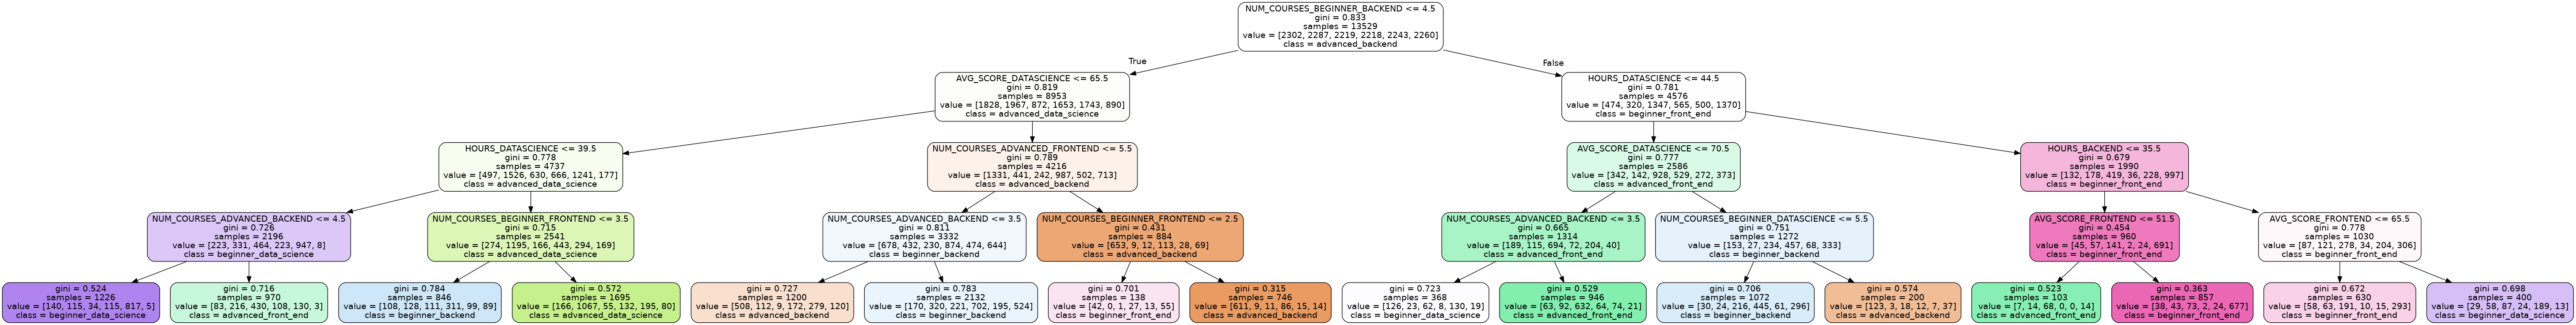

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Tech_depth.png')
Image(graph.create_png())

                       precision    recall  f1-score   support

     advanced_backend       0.60      0.60      0.60       961
advanced_data_science       0.50      0.61      0.55       963
   advanced_front_end       0.67      0.49      0.57      1025
     beginner_backend       0.52      0.48      0.50       929
beginner_data_science       0.58      0.59      0.58       972
   beginner_front_end       0.59      0.66      0.62       949

             accuracy                           0.57      5799
            macro avg       0.58      0.57      0.57      5799
         weighted avg       0.58      0.57      0.57      5799



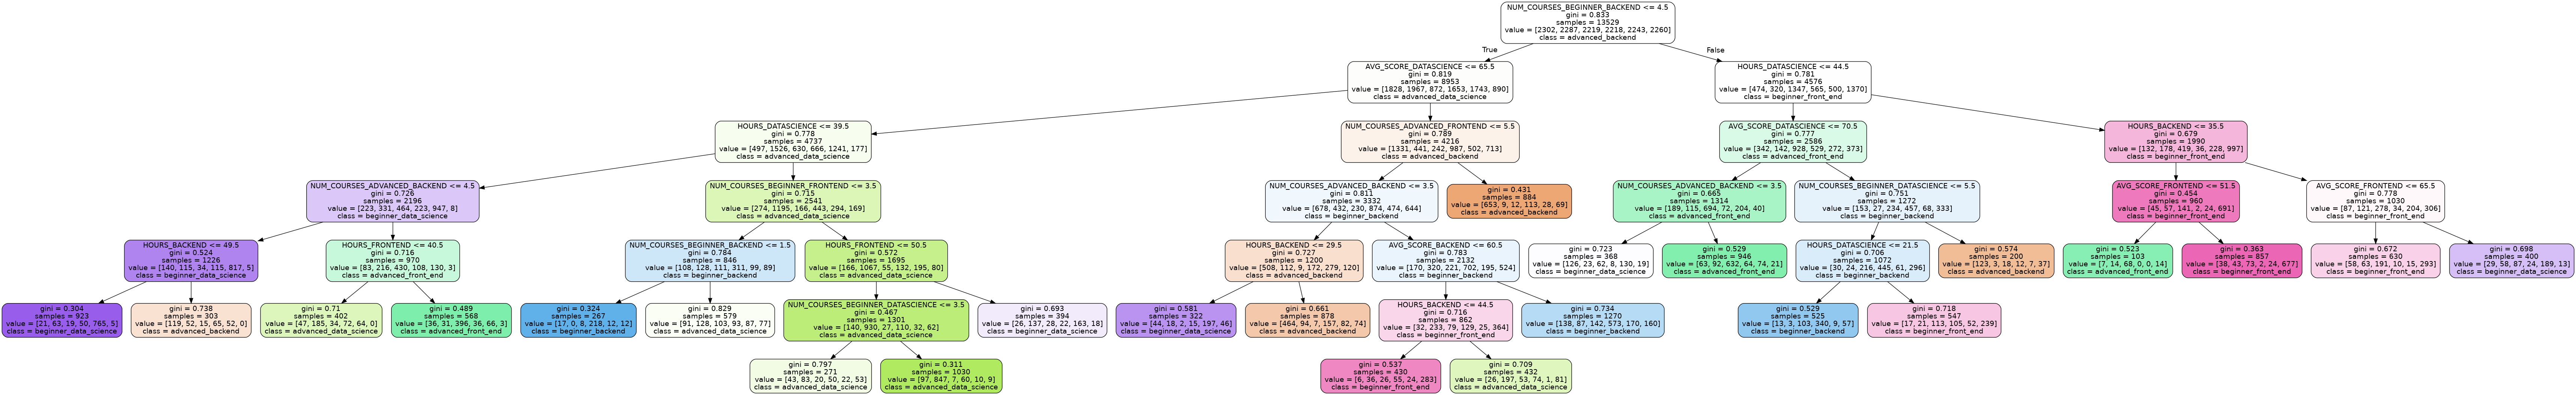

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test
clf = DecisionTreeClassifier(min_impurity_decrease=0.005)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=X.columns,class_names=clf.classes_)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Tech_impurity.png')
Image(graph.create_png())